# Step 1: Install and Set Up Kaggle API

In [3]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/  # Assumes your Kaggle API token is saved in 'kaggle.json'
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


# Step 2: Download the Dataset from Kaggle



In [4]:
!kaggle datasets download -d cosmos98/twitter-and-reddit-sentimental-analysis-dataset


Dataset URL: https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset
License(s): CC-BY-NC-SA-4.0
 50% 5.00M/10.0M [00:00<00:00, 28.5MB/s]
100% 10.0M/10.0M [00:00<00:00, 49.8MB/s]


# Step 3: Extract the Dataset

In [5]:
import zipfile

with zipfile.ZipFile('twitter-and-reddit-sentimental-analysis-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('sentiment_data')


# Step 4: Load the Dataset

In [6]:
import pandas as pd

df = pd.read_csv('sentiment_data/Twitter_Data.csv')  # Adjust the path as necessary
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


# Step 5: Data Exploration



1.   Check missing values




In [8]:
print(df.isnull().sum())


clean_text    4
category      7
dtype: int64




*   Drop rows with missing values



In [9]:
df = df.dropna(subset=['clean_text', 'category'])


# Step 3: Perform Sentiment Labeling and Analysis

In [11]:
#Create sentiment labels:
df['sentiment_label'] = df['category'].apply(lambda x: 'positive' if x == 1.0 else ('neutral' if x == 0.0 else 'negative'))

<ipython-input-11-45bcb81e27df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_label'] = df['category'].apply(lambda x: 'positive' if x == 1.0 else ('neutral' if x == 0.0 else 'negative'))


In [13]:
#Check distribution of sentiment labels:
print(df['sentiment_label'].value_counts())


sentiment_label
positive    72249
neutral     55211
negative    35509
Name: count, dtype: int64


# Step 4: Visualize Sentiment Distribution

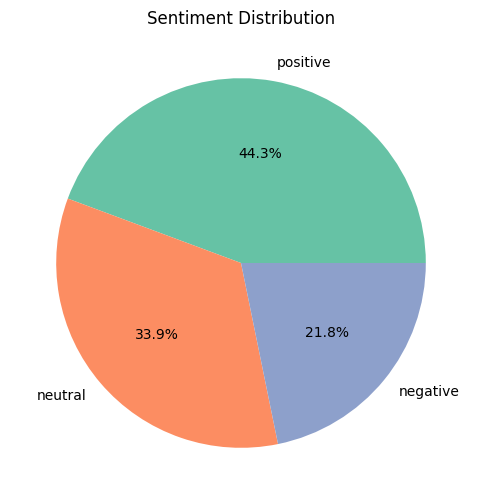

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['sentiment_label'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66c2a5','#fc8d62','#8da0cb'])
plt.title('Sentiment Distribution')
plt.ylabel('')  # Remove the default ylabel
plt.show()


#  Word Cloud for Positive and Negative Sentiments

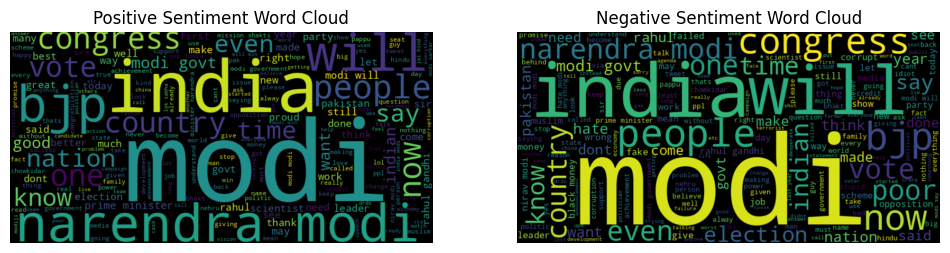

In [18]:
from wordcloud import WordCloud

positive_words = ' '.join(df[df['sentiment_label'] == 'positive']['clean_text'])
negative_words = ' '.join(df[df['sentiment_label'] == 'negative']['clean_text'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=800, height=400).generate(positive_words), interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=800, height=400).generate(negative_words), interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')

plt.show()


# Bar Plot of Sentiment Counts by Category


<ipython-input-19-655e088925f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-

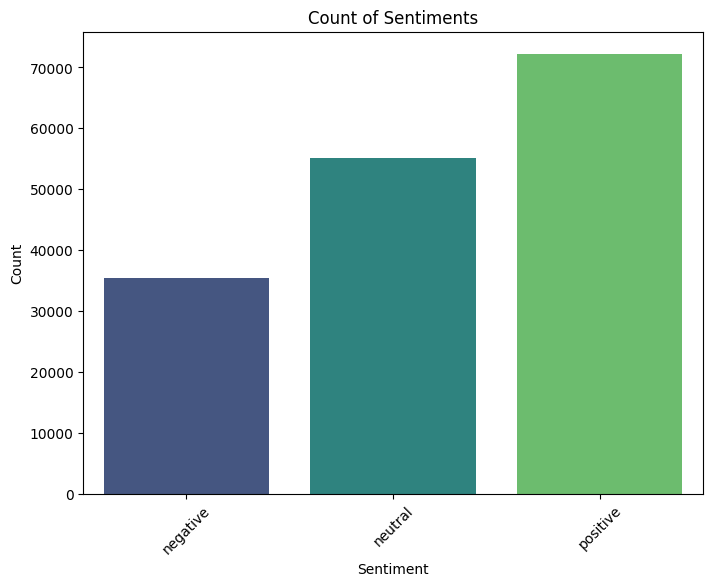

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=df, palette='viridis')
plt.title('Count of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Box Plot for Sentiment Length

<ipython-input-20-ea6b2915e6f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['clean_text'].apply(len)
<ipython-input-20-ea6b2915e6f1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment_label', y='text_length', data=df, palette='Set3')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/

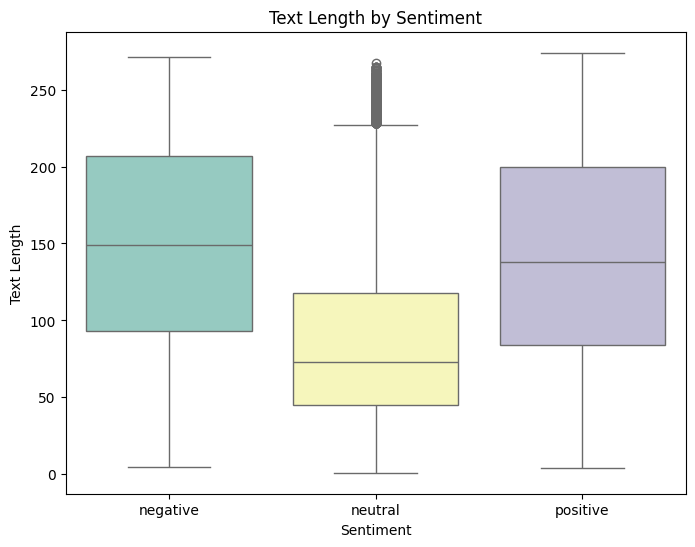

In [20]:
df['text_length'] = df['clean_text'].apply(len)

plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment_label', y='text_length', data=df, palette='Set3')
plt.title('Text Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.show()
